**#1. Loading the Data**

Importing the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3


Load Dataset

In [3]:
# Connect to the database
conn = sqlite3.connect(r'.\data\titanic.db')

# Load the data into a DataFrame
df = pd.read_sql_query("SELECT * FROM titanic", conn)

# Close the connection
conn.close()

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilySize,AgeGroup,FareCategory,Age*Pclass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0.014151,S,Mr,2,Young Adult,Low,66.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,0.139136,C,Mrs,2,Adult,High,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,0.015469,S,Miss,1,Young Adult,Low,78.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,0.103644,S,Mrs,2,Adult,High,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,0.015713,S,Mr,1,Adult,Low,105.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           891 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Embarked      891 non-null    object 
 11  Title         891 non-null    object 
 12  FamilySize    891 non-null    int64  
 13  AgeGroup      891 non-null    object 
 14  FareCategory  891 non-null    object 
 15  Age*Pclass    891 non-null    float64
dtypes: float64(3), int64(6), object(7)
memory usage: 111.5+ KB


**#2. Calculate key statistics**

In [6]:
survival_rate = df['Survived'].mean()
print(f"Overall Survival Rate: {survival_rate:.2f}")

Overall Survival Rate: 0.38


In [7]:
survival_rate_by_gender = df.groupby('Sex')['Survived'].mean()
print(f"Survival Rate by Gender:\n{survival_rate_by_gender}")

Survival Rate by Gender:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


In [8]:
survival_rate_by_class = df.groupby('Pclass')['Survived'].mean()
print(f"Survival Rate by Class:\n{survival_rate_by_class}")

Survival Rate by Class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [9]:
age_distribution = df['Age'].describe()
print(f"Age Distribution:\n{age_distribution}")

Age Distribution:
count    891.000000
mean      29.779091
std       13.017438
min        0.420000
25%       22.000000
50%       30.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64


In [10]:
fare_distribution = df['Fare'].describe()
print(f"Fare Distribution:\n{fare_distribution}")

Fare Distribution:
count    891.000000
mean       0.062858
std        0.096995
min        0.000000
25%        0.015440
50%        0.028213
75%        0.060508
max        1.000000
Name: Fare, dtype: float64


**#3. Visualizations**

**1. Distribution of Passengers by Class**

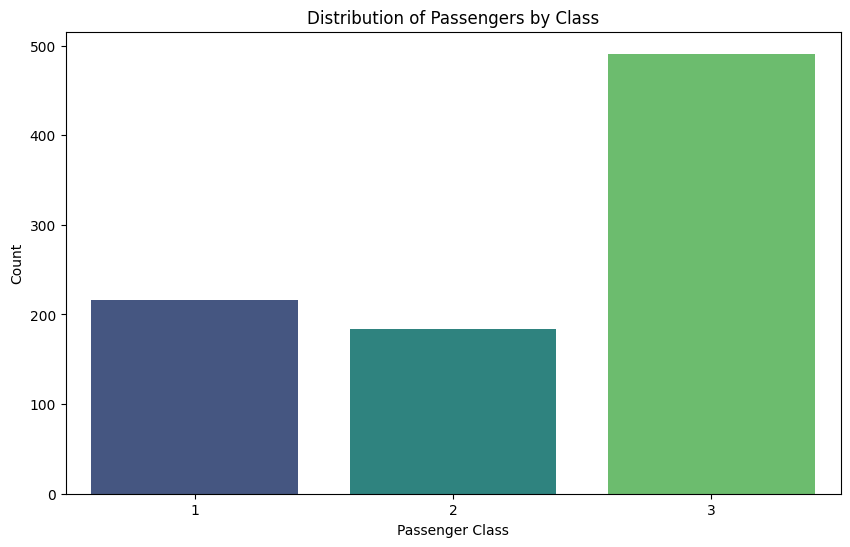

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Pclass', data=df, palette='viridis')
plt.title('Distribution of Passengers by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

Conclusion:

The count plot reveals that the majority of passengers on the Titanic were in third class, followed by first and second class. This distribution reflects the economic diversity of passengers. 

**2.Survival Rate by Gender**

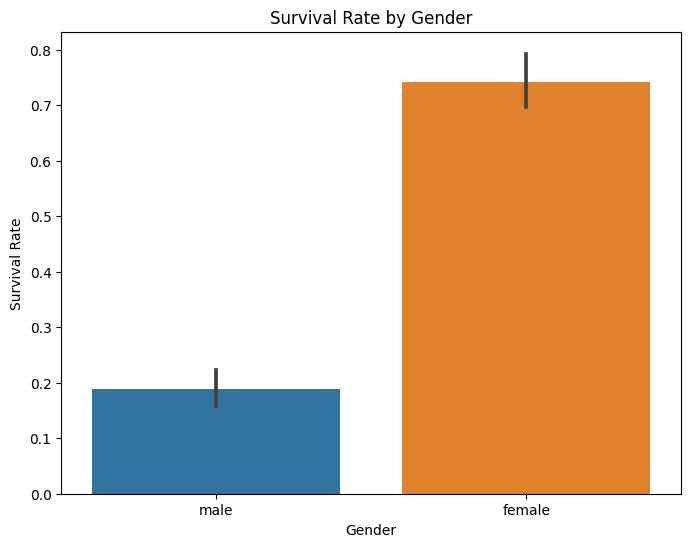

In [12]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.show()

Conclusion:

The bar plot shows that females had a significantly higher survival rate compared to males. This finding aligns with historical accounts that women and children were given priority during the evacuation.

**Survival Rate by Class**

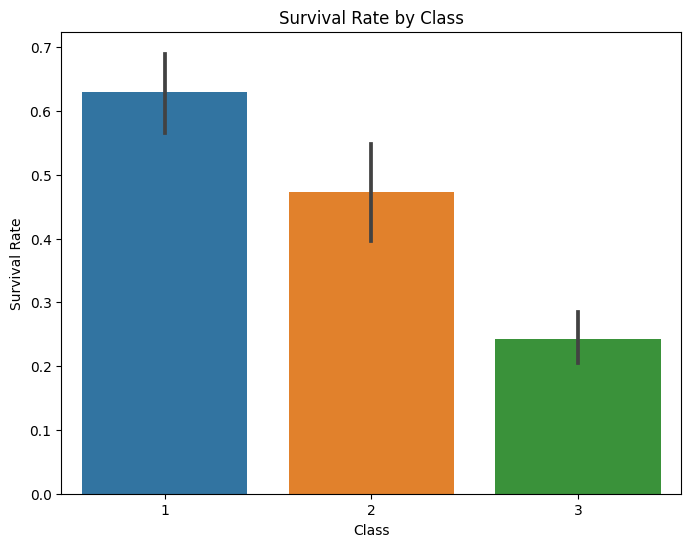

In [13]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Class')
plt.xlabel('Class')
plt.ylabel('Survival Rate')
plt.show()

Conclusion:

The bar plot indicates that first-class passengers had the highest survival rate, followed by second-class passengers, with third-class passengers having the lowest survival rate. This trend highlights the influence of socio-economic status on survival chances during the disaster.

**4. Fare Distribution by Class**

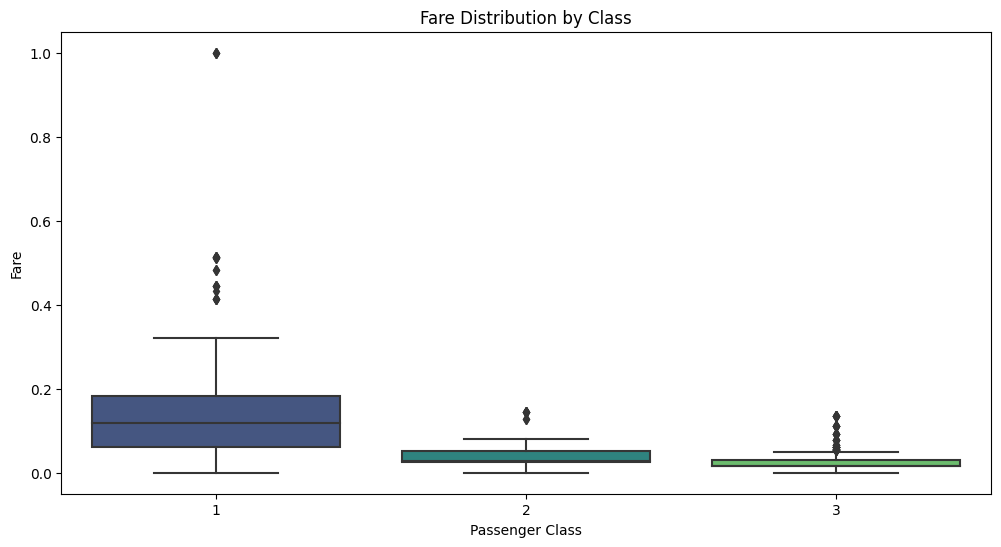

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Pclass', y='Fare', data=df, palette='viridis')
plt.title('Fare Distribution by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Fare')
plt.show()

Conclusion:

The box plot illustrates that first-class passengers paid significantly higher fares compared to second and third-class passengers. The fare distribution also shows a wider range of fares for first-class passengers, reflecting the availability of various luxury accommodations.

**5. Survival Rate by Embarkation Point**

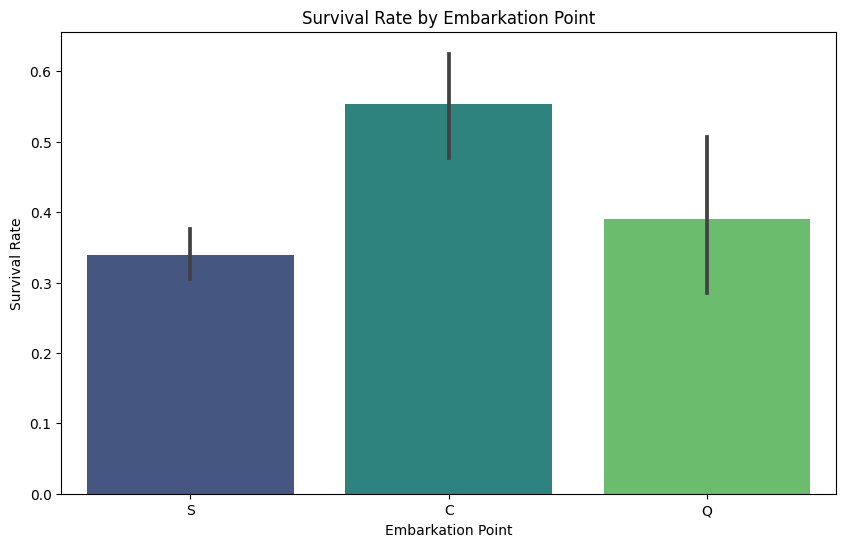

In [16]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Embarked', y='Survived', data=df, palette='viridis')
plt.title('Survival Rate by Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Survival Rate')
plt.show()

Conclusion:

The bar plot indicates that passengers who embarked from Cherbourg (C) had the highest survival rate, followed by those from Queenstown (Q) and Southampton (S). This variation may be influenced by differences in passenger demographics and class distribution at each embarkation point.

**6. Pair Plot**

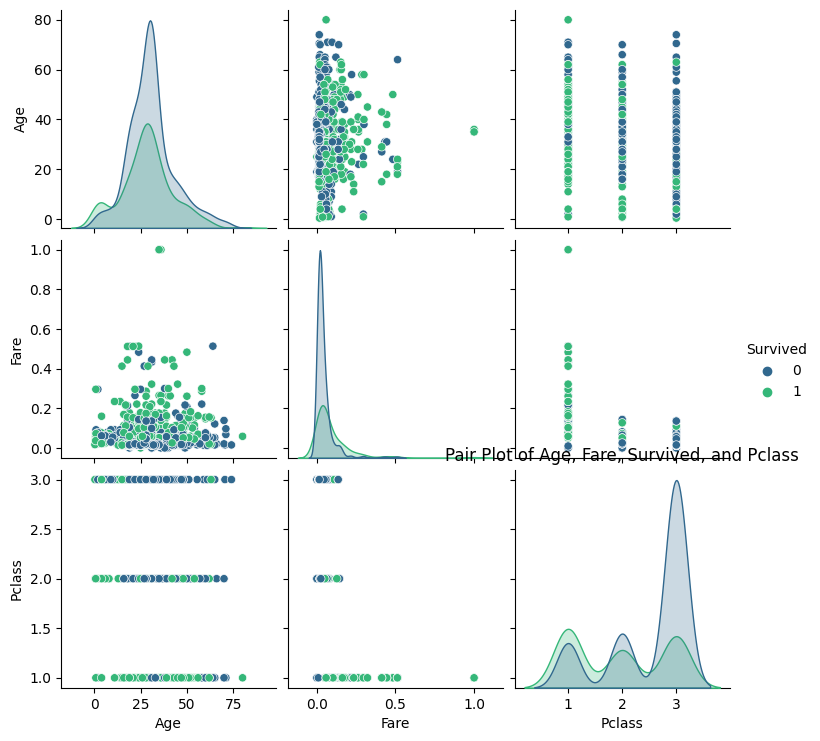

In [18]:
sns.pairplot(df[['Age', 'Fare', 'Survived', 'Pclass']], hue='Survived', palette='viridis')
plt.title('Pair Plot of Age, Fare, Survived, and Pclass')
plt.show()

Conclusion:

The pair plot provides a visual representation of the relationships between age, fare, survival status, and passenger class. It highlights that first-class passengers tend to be older and pay higher fares, while survival rates are visually higher among passengers with higher fares and lower class numbers.